VOL_ROI_DS_1_REG_0.001


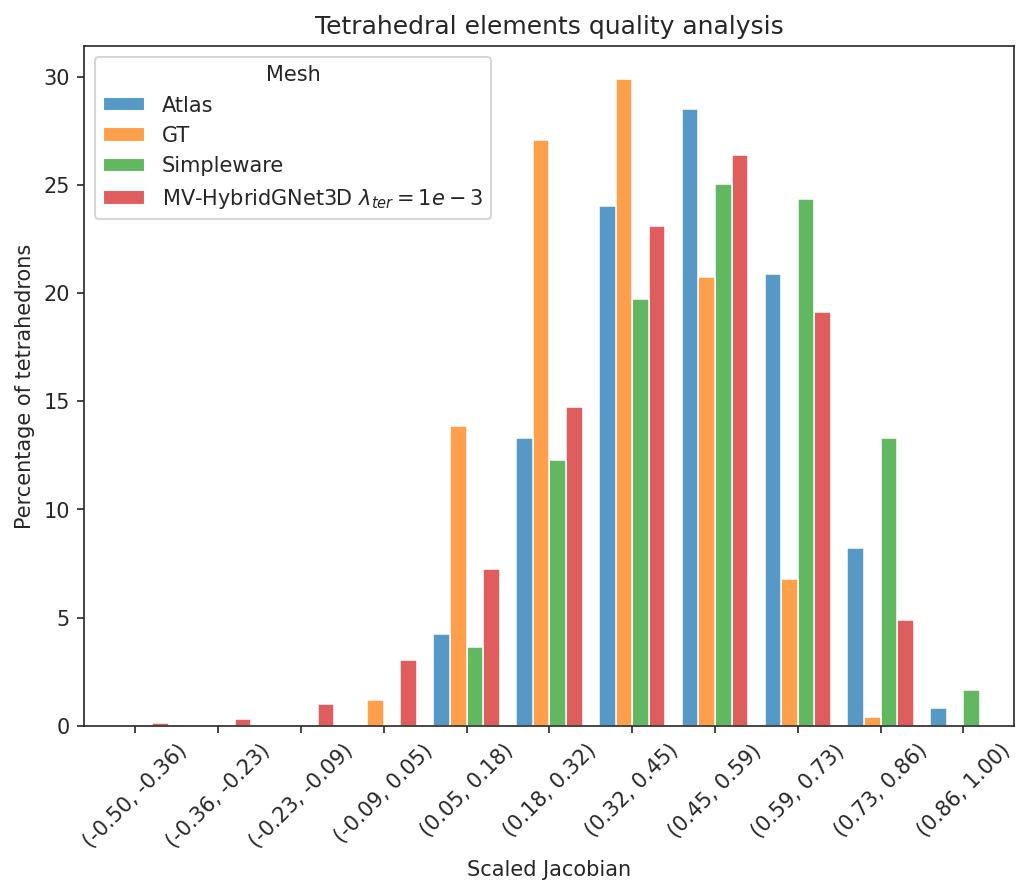

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 

sns.set_style("ticks")

atlas = np.load("../VolumetricQuality/atlas_jac.npy")
mean_ben = np.load("../VolumetricQuality/Ben_meshes.npy")
gt = np.load("../VolumetricQuality/GT_jac_mean_tetra.npy")

df_atlas = pd.DataFrame(atlas, columns = ["Quality"])
df_atlas['Mesh'] = "Atlas"

df_GT = pd.DataFrame(gt, columns = ["Quality"])
df_GT['Mesh'] = "GT"

df_simpleware = pd.DataFrame(mean_ben, columns = ["Quality"])
df_simpleware['Mesh'] = "Simpleware"

models = os.listdir("../Predictions/Volumetric")

dfs_list = [df_atlas, df_GT, df_simpleware]

for model in models:
    path = "../Predictions/Volumetric/" + model + "/mean_scaled_jacobian_tetra.npy"
    
    if not os.path.exists(path):
        continue
        
    model_name = "MV-HybridGNet3D $\lambda_{ter} = " + model.split("_")[-1] + "$"
    
    if not "0.001" in model_name:
        continue
    model_name = model_name.replace("0.001", "1e-3")
    
    mean = np.load(path)
    df = pd.DataFrame(mean, columns = ["Quality"])
    df['Mesh'] = model_name
    
    print(model)
    
    dfs_list.append(df)

dfs = pd.concat(dfs_list)
dfs.reset_index(drop=True, inplace=True)

plt.figure(figsize = (8, 6), dpi = 150)

bins = np.linspace(-0.5, 1, 12)
tickpos = []
ticks = []
for j in range(1, len(bins)):
    tickpos.append((bins[j] + bins[j-1])/2)
    ticks.append("(%.2f, %.2f)" %(bins[j-1],bins[j]))

ax = sns.histplot(x="Quality", hue="Mesh", bins = bins, multiple="dodge", data=dfs, shrink = 0.8, stat='percent', common_norm=False)
#ax = sns.histplot(x="Quality", hue="Mesh", bins = bins, multiple="dodge", data=dfs, shrink = 0.8)
ax.set_xticks(tickpos, ticks, rotation = 45)

plt.title("Tetrahedral elements quality analysis")
plt.ylabel("Percentage of tetrahedrons")
plt.xlabel("Scaled Jacobian")
plt.margins(x=0.02)

plt.savefig('../VolumetricQuality/histogram.pdf', bbox_inches='tight', dpi=200)


In [27]:
# Create a table from the dfs dataframe
# The table contains mean and std, min, max, 1%, 5%, 25%, 50%, 75% of the quality measures

df_table = pd.DataFrame(columns=['Mesh', 'mean', 'std', 'min', 'max', '1%', '5%', '25%', '50%', '75%'])

for df in dfs_list:
    mesh = df['Mesh'].values[0]
    
    df = df["Quality"]
    
    mean = df.mean()
    std = df.std()
    min = df.min()
    max = df.max()
    p1 = df.quantile(0.01)
    p5 = df.quantile(0.05)
    p25 = df.quantile(0.25)
    p50 = df.quantile(0.50)
    p75 = df.quantile(0.75)
    
    # round values to 3 decimals
    mean, std, min, max, p1, p5, p25, p50, p75 = round(mean, 3), round(std, 3), round(min, 3), round(max, 3), round(p1, 3), round(p5, 3), round(p25, 3), round(p50, 3), round(p75, 3)
    
    
    df_table = df_table.append({'Mesh': mesh, 'mean': mean, 'std': std, 'min': min, 'max': max, '1%': p1, '5%': p5, '25%': p25, '50%': p50, '75%': p75}, ignore_index=True)
        
df_table.reset_index(drop=True, inplace=True)
df_table

/tmp/ipykernel_1328728/3526467942.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_table = df_table.append({'Mesh': mesh, 'mean': mean, 'std': std, 'min': min, 'max': max, '1%': p1, '5%': p5, '25%': p25, '50%': p50, '75%': p75}, ignore_index=True)
/tmp/ipykernel_1328728/3526467942.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_table = df_table.append({'Mesh': mesh, 'mean': mean, 'std': std, 'min': min, 'max': max, '1%': p1, '5%': p5, '25%': p25, '50%': p50, '75%': p75}, ignore_index=True)
/tmp/ipykernel_1328728/3526467942.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_table = df_table.append({'Mesh': mesh, 'mean': mean, 'std': std, 'min': min, 'max': max, '1%': p1, '5%': p5, '25%': p25, '50%': p50, 

,Mesh,mean,std,min,max,1%,5%,25%,50%,75%
0,Atlas,0.491,0.174,0.092,0.984,0.115,0.194,0.367,0.494,0.617
1,GT,0.355,0.156,-0.207,0.838,0.04,0.103,0.238,0.353,0.47
2,Simpleware,0.524,0.185,0.064,0.992,0.128,0.202,0.387,0.535,0.667
3,MV-HybridGNet3D $\lambda_{ter} = 0.01$,0.501,0.309,-0.931,0.943,-0.681,-0.298,0.434,0.577,0.688
4,MV-HybridGNet3D $\lambda_{ter} = 0$,0.222,0.225,-0.759,0.876,-0.327,-0.144,0.065,0.219,0.384
5,MV-HybridGNet3D $\lambda_{ter} = 0.0001$,0.229,0.23,-0.771,0.871,-0.337,-0.151,0.068,0.231,0.397
6,MV-HybridGNet3D $\lambda_{ter} = 0.001$,0.433,0.206,-0.719,0.904,-0.138,0.059,0.307,0.457,0.585


In [3]:
dfs

[         Quality   Mesh
 0       0.397503  Atlas
 1       0.204022  Atlas
 2       0.225146  Atlas
 3       0.480566  Atlas
 4       0.181181  Atlas
 ...          ...    ...
 408759  0.293184  Atlas
 408760  0.329189  Atlas
 408761  0.409648  Atlas
 408762  0.296716  Atlas
 408763  0.335616  Atlas
 
 [408764 rows x 2 columns],
           Quality        Mesh
 0        0.358434  Simpleware
 1        0.472415  Simpleware
 2        0.428141  Simpleware
 3        0.268504  Simpleware
 4        0.569362  Simpleware
 ...           ...         ...
 4695350  0.530587  Simpleware
 4695351  0.434947  Simpleware
 4695352  0.318255  Simpleware
 4695353  0.682447  Simpleware
 4695354  0.672394  Simpleware
 
 [4695355 rows x 2 columns]]